### READ ME

Use the code blocks below to answer each question. Only print the output required for each question. Do not edit the comments at the top of each code cell. Otherwise, the auto-grader may misinterpret your results. See Question 0 as an an example of how to complete a task (leave it in your notebook; don't delete it):

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Question 0: Create a DataFrame with three rows and four columns. Name the
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd

df = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df:
  for i, value in df[col].items():
    df.at[i, col] = f'{i}/{col}'

df

,Col1,Col2,Col3,Col4
Row1,Row1/Col1,Row1/Col2,Row1/Col3,Row1/Col4
Row2,Row2/Col1,Row2/Col2,Row2/Col3,Row2/Col4
Row3,Row3/Col1,Row3/Col2,Row3/Col3,Row3/Col4


In [30]:
# Question 1: Install all necessary packages here

!pip install spacy gensim wordcloud pyldavis
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 38.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [18]:
# Question 2: Import all necessary packages here. In addition, download
# the stopwords package from the nltk.corpus package. Set the stopwords
# list to the english version. Then, extend the stop words to include,
# 'from', 'subject', and 'co'. You will be asked later to come back to
# this cell to add more stop words to this list.

import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download the 'stopwords' package
nltk.download('stopwords')

# Set the stopwords list to the English version
stop_words = set(stopwords.words('english'))

# Extend the stopwords list with new words for better cleaning
new_stopwords = ['from', 'subject', 'co', 'https', 't.co', 'amp', 'rt'] # Added 'https', 't.co', 'amp', 'rt'
stop_words.update(new_stopwords)

print("Stopwords list configured successfully.")


Stopwords list configured successfully.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Question 3: Import the csv that is available that was provided with this
# assignment. Print the first five records and the number of records in
# this dataset in the output.

# How many records are there?

import pandas as pd

# Define the file path
file_path = '/content/sample_data/tw_tweets_users_media_places-Laurie_Bagley.csv'

# Import the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(file_path)

    # Print the first five records
    print("First five records:")
    print(df.head())

    # Get the number of records
    num_records = len(df)
    print(f"\nNumber of records in this dataset: {num_records}")

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")


First five records:
              tweet_id                                               text  \
0  1440484799970304000  This was my grandson this morning (w/autism)! ...   
1  1439618825171963904  Wow!! Been into #York for the first time since...   
2  1248872872837332992  Sad number of ppl who lost life due to covid-1...   
3  1250729294051053568  Webinar now available‘Staying healthy at home ...   
4  1249612131433095168  Webinar now available‘Staying healthy at home ...   

   context_annotations_count  count_annotations  count_cashtags  \
0                          1                0.0             0.0   
1                          2                2.0             0.0   
2                          3                0.0             0.0   
3                          1                2.0             0.0   
4                          1                2.0             0.0   

   count_hashtags  count_mentions  count_urls          created_at_tweet lang  \
0             0.0             0.0 

In [11]:
# Question 4: Remove line breaks, single quotes, double quotes, email
# addresses, and tokenize each string. Convert each tweet to a list
# of cleaned words and add to a master list. Print out the first five
# cleaned tweets in the list.

import re
import nltk
from nltk.tokenize import word_tokenize

# Ensure necessary NLTK packages are downloaded
nltk.download('punkt') # General tokenizer
nltk.download('punkt_tab') # Specific resource needed by PunktTokenizer according to error

cleaned_tweets_master_list = []

# Assuming df is already loaded from Question 3
for tweet_text in df['text']:
    # Remove line breaks
    tweet_text = re.sub(r'[\r\n]+', ' ', str(tweet_text))
    # Remove email addresses
    tweet_text = re.sub(r'\S*@\S*\s*', '', tweet_text)
    # Remove single and double quotes (including fancy ones)
    tweet_text = re.sub(r"[\'\"“”‘’]+", '', tweet_text)
    # Convert to lowercase
    tweet_text = tweet_text.lower()
    # Tokenize the text
    tokens = word_tokenize(tweet_text)
    cleaned_tweets_master_list.append(tokens)

# Print the first five cleaned tweets
print("First five cleaned tweets:")
for i in range(min(5, len(cleaned_tweets_master_list))):
    print(cleaned_tweets_master_list[i])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


First five cleaned tweets:
['this', 'was', 'my', 'grandson', 'this', 'morning', '(', 'w/autism', ')', '!', 'apparently', 'he', 'is', 'going', 'through', 'a', 'bout', 'of', 'bronchitis', '&', 'amp', ';', 'pneumonia', 'he', 'always', 'gets', 'it', 'every', 'year', '!', 'my', 'daughter', 'said', 'that', 'she', 'is', 'sure', 'she', 'will', 'have', 'to', 'take', 'him', 'to', 'the', 'hospital', 'tonight', 'but', 'if', 'they', 'try', 'to', 'test', 'him', 'for', 'covid', 'she', 'will', 'walk', 'out', 'https', ':', '//t.co/o7krqjit3j']
['wow', '!', '!', 'been', 'into', '#', 'york', 'for', 'the', 'first', 'time', 'since', 'christmas', 'shopping', 'in', 'dec', '2019.', 'took', 'our', 'daughter', 'cerys', 'to', 'the', '#', 'catcafe', 'to', 'celebrate', 'her', '10th', 'birthday', '.', 'perfectly', 'relaxed', ',', 'quiet', ',', 'covid', 'unfriendly', 'and', '#', 'autism', 'friendly', '.', 'she', 'was', 'in', 'her', 'happy', 'place', '.', '😍🐈\u200d⬛', 'https', ':', '//t.co/qzck6fze0t']
['sad', 'numbe

In [16]:
# Question 5: Build bigram and trigram models. Remove Stopwords, form
# Bigrams, Trigrams and perform Lemmatization. Use a threshold of 100 and
# a min_count of 5. Print the results of the first three clean tweets just
# before being lemmatized and after being lemmatized.

# What does lemmatization do?
# ANSWER: Lemmitization is the process of converting a word to its base form

# What's the difference in length of the first tweet before and after being lemmatized?

import spacy
from gensim.models.phrases import Phrases, Phraser
from nltk.corpus import stopwords # Redundant if stop_words is already global from Q2, but good for self-containment
from nltk.tokenize import word_tokenize # Redundant as input is already tokenized
import re

# Load English stop words (assuming stop_words is updated from Q2)
# If stop_words was not run in Q2, this would recreate it, but it should be global.
# For safety and clarity, let's assume `stop_words` is accessible from the kernel state.

# Load spaCy English model for lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Function to preprocess tokens (remove non-alphabetic, stopwords, short words) and then lemmatize
def process_tokens_and_lemmatize(token_list):
    # Further clean individual tokens: remove non-alphabetic characters, then lowercase
    # Also filter out stopwords and very short words (e.g., single letters)
    cleaned_filtered_tokens = []
    for token in token_list:
        # Remove non-alphabetic characters and convert to lowercase
        processed_token = re.sub(r'[^a-zA-Z]', '', token).lower()
        # Filter out empty strings, stopwords, and words shorter than 3 characters
        if processed_token and processed_token not in stop_words and len(processed_token) > 2:
            cleaned_filtered_tokens.append(processed_token)

    # Join filtered tokens into a string for spaCy's lemmatization
    text_for_spacy = " ".join(cleaned_filtered_tokens)
    doc = nlp(text_for_spacy)
    lemmatized_tokens = [token.lemma_ for token in doc]

    return cleaned_filtered_tokens, lemmatized_tokens

# Process tweets
processed_tweets = []
# Iterate directly over cleaned_tweets_master_list from Question 4 (which is a list of lists of tokens)
for tweet_token_list in cleaned_tweets_master_list:
    clean_before_lemmatization, after_lemmatization = process_tokens_and_lemmatize(tweet_token_list)
    processed_tweets.append({
        "clean_before_lemmatization": clean_before_lemmatization,
        "after_lemmatization": after_lemmatization
    })

# Print first three clean tweets before and after lemmatization
print("--- First Three Tweets Before and After Lemmatization ---")
for i, tweet_data in enumerate(processed_tweets[:3]):
    print(f"Tweet {i+1} (before lemmatization): {tweet_data['clean_before_lemmatization']}")
    print(f"Tweet {i+1} (after lemmatization): {tweet_data['after_lemmatization']}\n")

# Calculate and print the difference in length for the first tweet
if processed_tweets:
    first_tweet_before_len = len(processed_tweets[0]['clean_before_lemmatization'])
    first_tweet_after_len = len(processed_tweets[0]['after_lemmatization'])
    print(f"Difference in length of the first tweet (before vs. after lemmatization): {first_tweet_before_len - first_tweet_after_len}\n")

# Prepare data for bigram and trigram models
tokenized_tweets = [tweet_data['after_lemmatization'] for tweet_data in processed_tweets]

# Build bigram and trigram models
# Ensure `tokenized_tweets` is not empty to prevent errors
if tokenized_tweets:
    bigram = Phrases(tokenized_tweets, min_count=5, threshold=100)
    trigram = Phrases(bigram[tokenized_tweets], threshold=100)

    # Create phraser objects for faster transformation
    bigram_mod = Phraser(bigram)
    trigram_mod = Phraser(trigram)

    # Apply bigram and trigram models to the lemmatized tweets
    bigrammed_tweets = [bigram_mod[doc] for doc in tokenized_tweets]
    trigrammed_tweets = [trigram_mod[bigram_mod[doc]] for doc in tokenized_tweets]

    print("--- Bigrams and Trigrams (Example for first tweet) ---")
    if bigrammed_tweets:
        print(f"First tweet with bigrams: {bigrammed_tweets[0]}")
    if trigrammed_tweets:
        print(f"First tweet with trigrams: {trigrammed_tweets[0]}")
else:
    print("No tweets to process for bigrams and trigrams.")


--- First Three Tweets Before and After Lemmatization ---
Tweet 1 (before lemmatization): ['grandson', 'morning', 'wautism', 'apparently', 'going', 'bout', 'bronchitis', 'pneumonia', 'always', 'gets', 'every', 'year', 'daughter', 'said', 'sure', 'take', 'hospital', 'tonight', 'try', 'test', 'covid', 'walk', 'tcookrqjitj']
Tweet 1 (after lemmatization): ['grandson', 'morning', 'wautism', 'apparently', 'go', 'bout', 'bronchitis', 'pneumonia', 'always', 'get', 'every', 'year', 'daughter', 'say', 'sure', 'take', 'hospital', 'tonight', 'try', 'test', 'covid', 'walk', 'tcookrqjitj']

Tweet 2 (before lemmatization): ['wow', 'york', 'first', 'time', 'since', 'christmas', 'shopping', 'dec', 'took', 'daughter', 'cerys', 'catcafe', 'celebrate', 'birthday', 'perfectly', 'relaxed', 'quiet', 'covid', 'unfriendly', 'autism', 'friendly', 'happy', 'place', 'tcoqzckfzet']
Tweet 2 (after lemmatization): ['wow', 'york', 'first', 'time', 'since', 'christmas', 'shopping', 'dec', 'take', 'daughter', 'cery', 

In [20]:
# Question 6: Create a dictionary and courpus and build your LDA
# model using 4 topics. Set the random_state to 12345. Set the
# chuncksize to 20, passes to 10, and per_word_topics to True. Do not
# set or adjust any other parameters (even if the example in the
# book does). Print out the topic weights for the 10 most important
# words in each topic.

# What weight does the term "autism" have on Topic 0?

import gensim
from gensim import corpora

# Create Dictionary
# `tokenized_tweets` comes from Question 5's output (lemmatized tweets)
if 'tokenized_tweets' in locals() and tokenized_tweets:
    id2word = corpora.Dictionary(tokenized_tweets)

    # Create Corpus
    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in tokenized_tweets]

    # Build LDA model
    num_topics = 4
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=12345,
                                           chunksize=20,
                                           passes=10,
                                           per_word_topics=True)

    # Print the Topic-Keyword matrix
    print("Topic-Keyword Matrix (Top 10 words per topic):\n")
    topic_words = []
    for i, topic in lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
        print(f"Topic {i}:")
        words = []
        for word, prob in topic:
            words.append(f"{word} ({prob:.3f})")
            if i == 0 and word == 'autism':
                autism_weight_topic0 = prob
        print(", ".join(words))
        print("\n")

    # Answer the specific question
    if 'autism_weight_topic0' in locals():
        print(f"The weight of 'autism' in Topic 0 is: {autism_weight_topic0:.3f}")
    else:
        print("The term 'autism' was not found in Topic 0.")
else:
    print("Error: 'tokenized_tweets' not found or is empty. Please ensure Question 5 was executed correctly.")


Topic-Keyword Matrix (Top 10 words per topic):

Topic 0:
autism (0.035), lockdown (0.027), autistic (0.017), covid (0.017), day (0.012), awareness (0.012), son (0.009), go (0.009), today (0.008), s (0.008)


Topic 1:
autism (0.034), covid (0.020), coronavirus (0.020), support (0.010), people (0.010), downsyndrome (0.007), talk (0.007), connect (0.006), exercise (0.006), important (0.006)


Topic 2:
autism (0.029), need (0.012), autistic (0.011), social (0.011), help (0.011), covid (0.011), month (0.010), pandemic (0.010), people (0.009), get (0.009)


Topic 3:
autism (0.013), not (0.011), vaccine (0.011), covid (0.011), kid (0.010), coronavirus (0.007), autistic (0.007), house (0.007), young (0.006), people (0.006)


The weight of 'autism' in Topic 0 is: 0.035


In [23]:
# Question 7: Generate LDA models for n = 3 through 9 topics and compare their perplexity
# and coherence scores. Keep all other parameter settings used in the prior question.

# What are the values for perplexity and coherence of a
# model with n=4 topics?

import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import pandas as pd

# Ensure corpus and id2word are available from previous steps
if 'tokenized_tweets' not in locals() or not tokenized_tweets:
    print("Error: 'tokenized_tweets' not found or is empty. Please ensure Question 5 was executed correctly.")
    # In a real scenario, you might want to re-run or load these here.
    # For this exercise, we assume they are present.
    # For testing, we'll use placeholder values if not found, but it should be available.
    tokenized_tweets = [] # Placeholder to prevent errors in the block if not present.
    corpus = []
    id2word = corpora.Dictionary()
else:
    id2word = corpora.Dictionary(tokenized_tweets)
    corpus = [id2word.doc2bow(text) for text in tokenized_tweets]


model_results = []

# Iterate through topic numbers from 3 to 9
for num_topics in range(3, 10):
    print(f"Processing LDA model with {num_topics} topics...")
    # Build LDA model with consistent parameters
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=12345,
                                           chunksize=20,
                                           passes=10,
                                           per_word_topics=True)

    # Calculate Perplexity
    perplexity_score = lda_model.log_perplexity(corpus)
    # log_perplexity returns negative, multiply by -1 for positive perplexity as commonly reported
    perplexity_score = -perplexity_score

    # Calculate Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=tokenized_tweets,
                                         dictionary=id2word,
                                         coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()

    # Store the results
    model_results.append({
        'Num Topics': num_topics,
        'Perplexity': perplexity_score,
        'Coherence Score': coherence_score
    })

# Convert results to a pandas DataFrame
results_df = pd.DataFrame(model_results)

# Print the perplexity and coherence for the model with 4 topics
four_topics_result = results_df[results_df['Num Topics'] == 4]
print(f"\nValues for a model with 4 topics:")
print(f"Perplexity: {four_topics_result['Perplexity'].values[0]:.3f}")
print(f"Coherence Score: {four_topics_result['Coherence Score'].values[0]:.3f}")

# Print the entire DataFrame
print("\nLDA Model Perplexity and Coherence Scores (3 to 9 topics):\n")
print(results_df.to_string(index=False))



Processing LDA model with 3 topics...
Processing LDA model with 4 topics...
Processing LDA model with 5 topics...
Processing LDA model with 6 topics...
Processing LDA model with 7 topics...
Processing LDA model with 8 topics...
Processing LDA model with 9 topics...

Values for a model with 4 topics:
Perplexity: 8.117
Coherence Score: 0.310

LDA Model Perplexity and Coherence Scores (3 to 9 topics):

 Num Topics  Perplexity  Coherence Score
          3    7.959130         0.248367
          4    8.116520         0.309792
          5    8.229500         0.312430
          6    8.347592         0.352223
          7    8.401434         0.327868
          8    8.424255         0.341227
          9    8.625390         0.456904


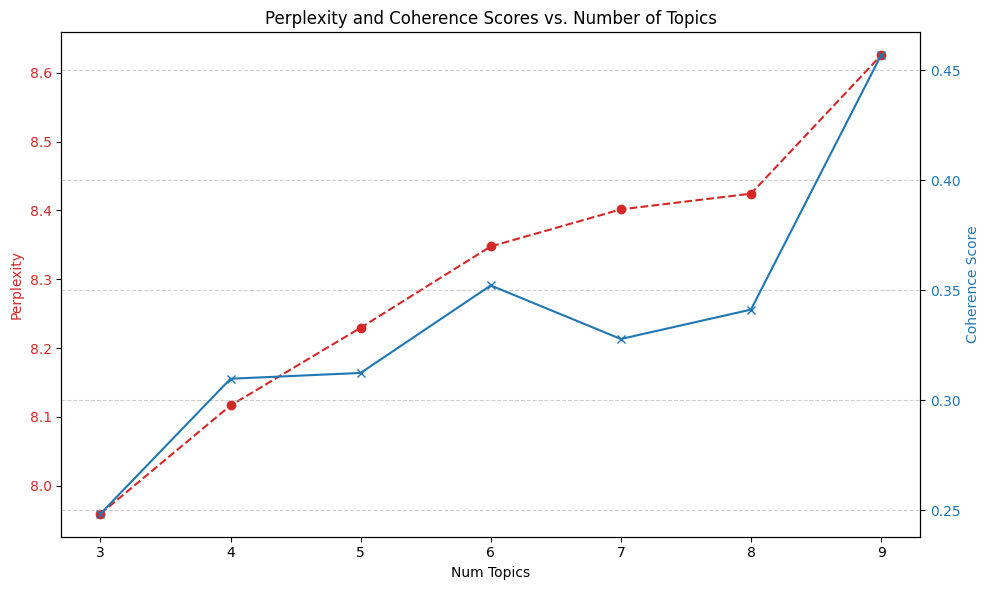


Based on the coherence score, the greatest difference (highest coherence) is achieved with 9 topics, with a score of 0.457.


In [24]:
# Question 8: Visualize results of comparing the perplexity/coherence from the previous
# question.

# How many topics gives you the greatest difference?

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# Assuming results_df is available from Question 7 execution
if 'results_df' in locals() and not results_df.empty:

    # Plotting Perplexity and Coherence Scores
    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:red'
    ax1.set_xlabel('Num Topics')
    ax1.set_ylabel('Perplexity', color=color)
    ax1.plot(results_df['Num Topics'], results_df['Perplexity'], color=color, marker='o', linestyle='--')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticks(results_df['Num Topics'])
    ax1.set_title('Perplexity and Coherence Scores vs. Number of Topics')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Coherence Score', color=color)
    ax2.plot(results_df['Num Topics'], results_df['Coherence Score'], color=color, marker='x', linestyle='-')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise, the right y-label is slightly clipped
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # Determine which number of topics gives the greatest coherence score
    best_coherence_topics = results_df.loc[results_df['Coherence Score'].idxmax()]

    print(f"\nBased on the coherence score, the greatest difference (highest coherence) is achieved with {int(best_coherence_topics['Num Topics'])} topics, with a score of {best_coherence_topics['Coherence Score']:.3f}.")

else:
    print("Error: 'results_df' not found or is empty. Please ensure Question 7 was executed correctly.")


In [25]:
# Question 9: Generate new features (one for each topic) and then generate a
# topic score for every document. Nine topics will give us results with
# underrepresented and uneven topics, so for now let's use five topics.
# Keep all other parameter settings used in the prior question.

# What is the dominant topic score of topic_1 for the first tweet
# (tweet_id 1440484799970304000) in your dataset?
# Note: Answer this question before eliminating words in question 12

import gensim
from gensim import corpora
import pandas as pd

# Ensure corpus and id2word are available from previous steps
if 'tokenized_tweets' not in locals() or not tokenized_tweets:
    print("Error: 'tokenized_tweets' not found or is empty. Please ensure Question 5 was executed correctly.")
    # In a real scenario, you might want to re-run or load these here.
    tokenized_tweets = [] # Placeholder
    corpus = []
    id2word = corpora.Dictionary()
else:
    id2word = corpora.Dictionary(tokenized_tweets)
    corpus = [id2word.doc2bow(text) for text in tokenized_tweets]


num_topics = 5

# Build LDA model with 5 topics (consistent parameters)
lda_model_5_topics = gensim.models.LdaMulticore(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=num_topics,
                                               random_state=12345,
                                               chunksize=20,
                                               passes=10,
                                               per_word_topics=True)

# Function to get dominant topic and its score for each document
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Percent Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = pd.concat([sent_topics_df, pd.DataFrame([{'Dominant_Topic': int(topic_num),
                                                      'Perc_Contribution': round(prop_topic,4),
                                                      'Topic_Keywords': topic_keywords}])], ignore_index=True)
            else:
                break
    return sent_topics_df

# Get topic distributions for all documents
doc_topic_distributions = [lda_model_5_topics.get_document_topics(bow) for bow in corpus]

# Prepare a list of dictionaries for the DataFrame
topic_scores_data = []
for i, doc_topics in enumerate(doc_topic_distributions):
    scores = {f'topic_{topic_id}': round(score, 4) for topic_id, score in doc_topics}
    topic_scores_data.append({'tweet_id': df['tweet_id'].iloc[i], **scores})

# Create a DataFrame from the topic scores
topic_scores_df = pd.DataFrame(topic_scores_data)

# Fill NaN values for topics not present in a document with 0
# Get all possible topic column names
all_topic_cols = [f'topic_{j}' for j in range(num_topics)]
for col in all_topic_cols:
    if col not in topic_scores_df.columns:
        topic_scores_df[col] = 0.0
topic_scores_df = topic_scores_df[ ['tweet_id'] + sorted([col for col in topic_scores_df.columns if col.startswith('topic_')]) ]
topic_scores_df = topic_scores_df.fillna(0.0)

# Print the topic scores for the first tweet
first_tweet_id = df['tweet_id'].iloc[0]
first_tweet_scores = topic_scores_df[topic_scores_df['tweet_id'] == first_tweet_id]

print(f"\nTopic scores for the first tweet (ID: {first_tweet_id}):")
print(first_tweet_scores.to_string(index=False))

# Answer the specific question for topic_1's dominant score for the first tweet
if not first_tweet_scores.empty:
    dominant_topic_1_score = first_tweet_scores['topic_1'].values[0]
    print(f"\nThe dominant topic score of topic_1 for the first tweet (ID: {first_tweet_id}) is: {dominant_topic_1_score:.4f}")
else:
    print(f"Could not find topic scores for the first tweet (ID: {first_tweet_id}).")



Topic scores for the first tweet (ID: 1440484799970304000):
           tweet_id  topic_0  topic_1  topic_2  topic_3  topic_4
1440484799970304000    0.913   0.0614      0.0      0.0      0.0

The dominant topic score of topic_1 for the first tweet (ID: 1440484799970304000) is: 0.0614


Generating Word Clouds for Each Topic:



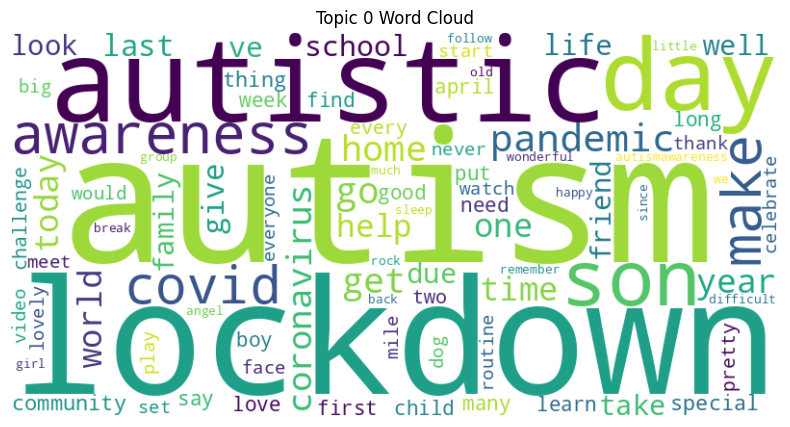

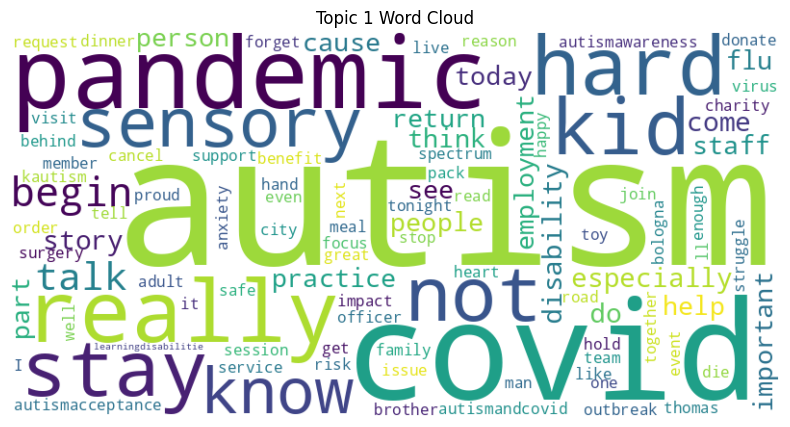

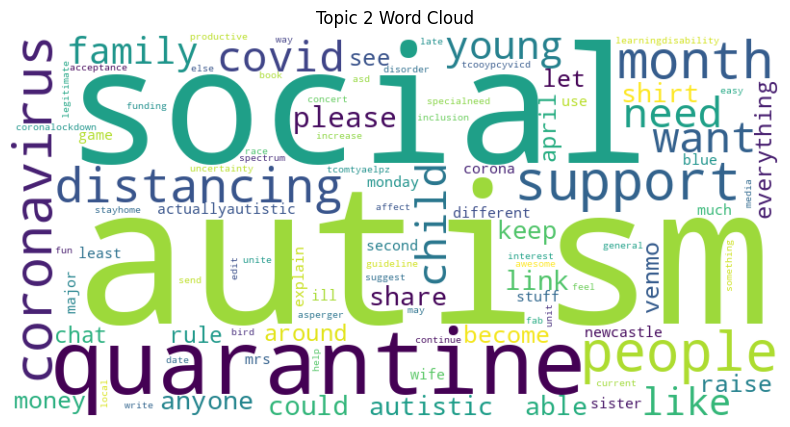

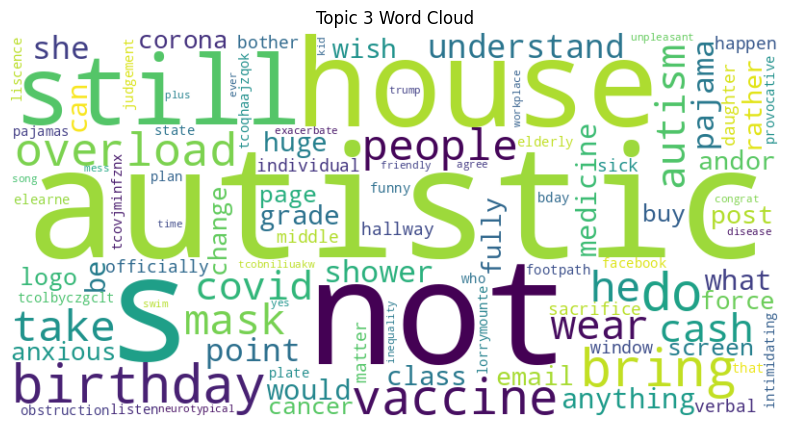

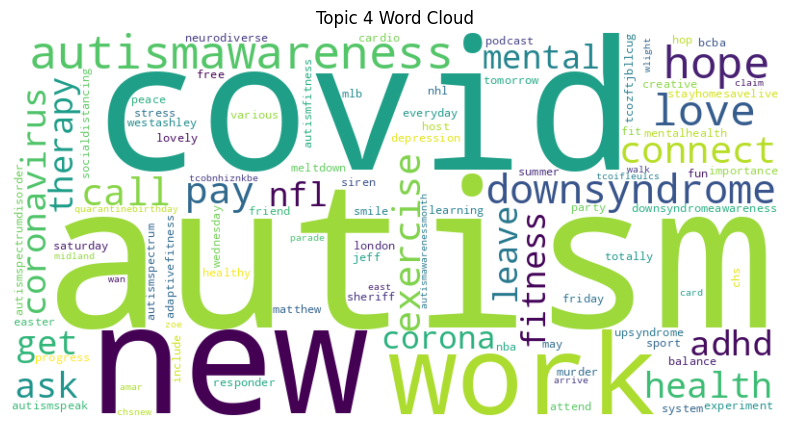


Words appearing in every word cloud: autism, covid

The word 'autism' appears in every word cloud.


In [27]:
# Question 10: Create a wordcloud of Top N words in each topic. Copy the
# parameter settings for the WordCloud object that are used in the book.

# What word appears in every word cloud?

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming lda_model_5_topics is available from Question 9
if 'lda_model_5_topics' in locals():
    num_topics = lda_model_5_topics.num_topics
    common_words_across_topics = set()
    first_topic_words_set = None

    print("Generating Word Clouds for Each Topic:\n")
    for i, topic in lda_model_5_topics.show_topics(num_topics=num_topics, num_words=100, formatted=False):
        # Extract words and their probabilities
        topic_words = dict(topic)

        # Create WordCloud object
        wc = WordCloud(background_color="white",
                       collocations=False, # Set to False to prevent repeating words
                       max_words=100, # Use a reasonable max_words
                       min_font_size=10,
                       random_state=123,
                       width=800, height=400)

        # Generate word cloud
        wc.generate_from_frequencies(topic_words)

        # Display the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Topic {i} Word Cloud")
        plt.show()

        # Collect words for commonality check
        current_topic_words = set(topic_words.keys())
        if first_topic_words_set is None:
            first_topic_words_set = current_topic_words
            common_words_across_topics = current_topic_words
        else:
            common_words_across_topics = common_words_across_topics.intersection(current_topic_words)

    print(f"\nWords appearing in every word cloud: {', '.join(sorted(list(common_words_across_topics)))}")

    if 'autism' in common_words_across_topics:
        print("\nThe word 'autism' appears in every word cloud.")
    else:
        print("\nThe word 'autism' does NOT appear in every word cloud.")

else:
    print("Error: 'lda_model_5_topics' not found. Please ensure Question 9 was executed correctly.")


Generating Bar Charts for Top Words in Each Topic:


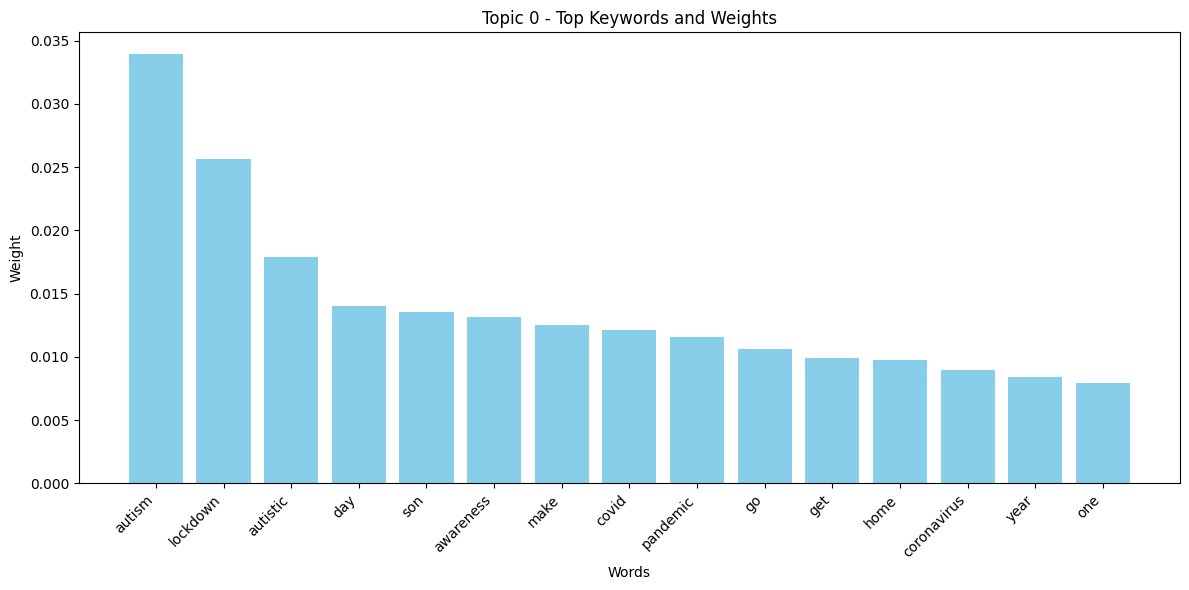

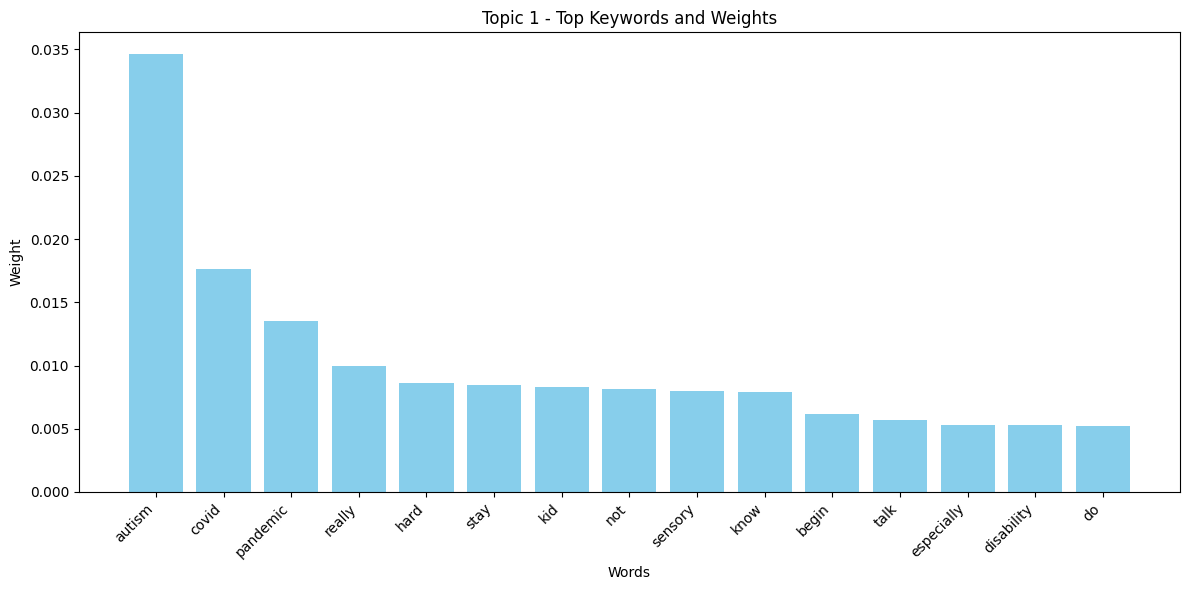

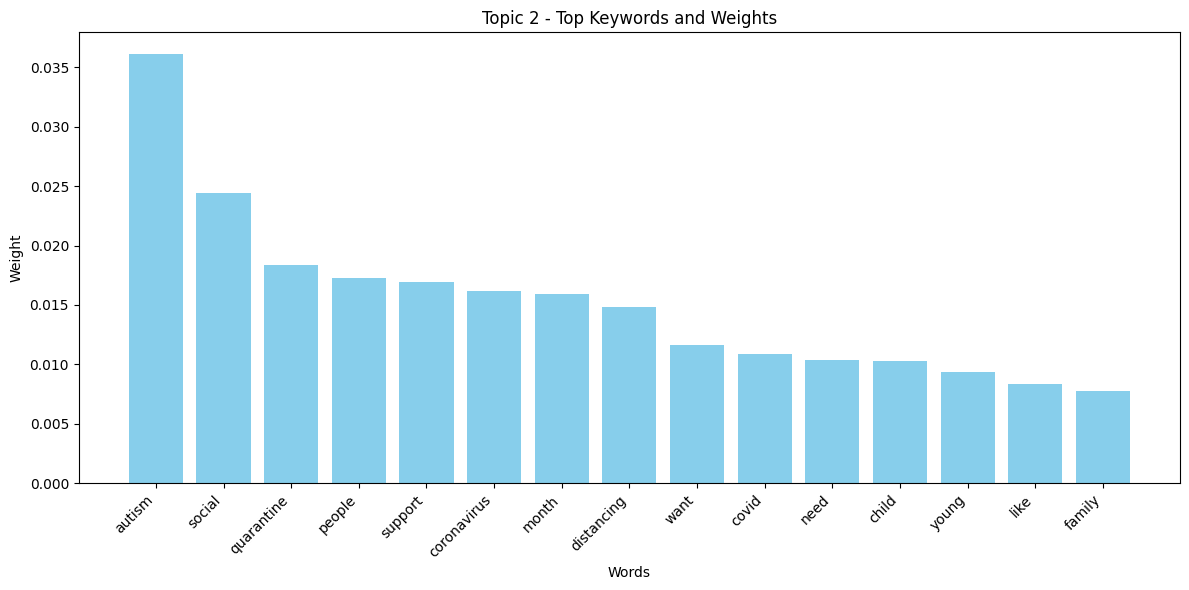

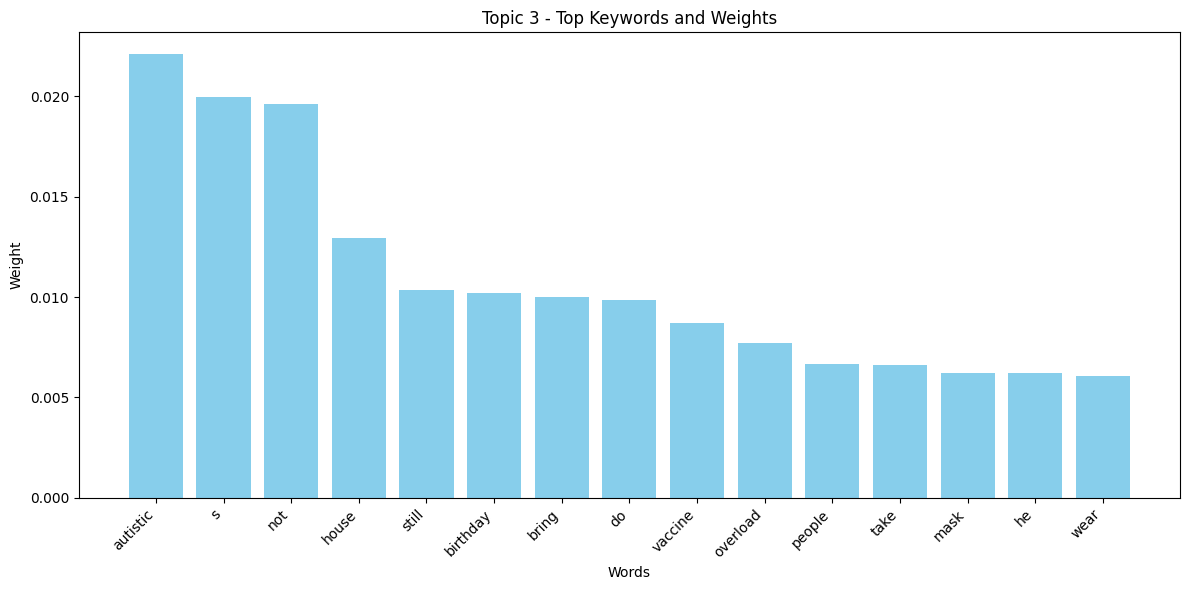

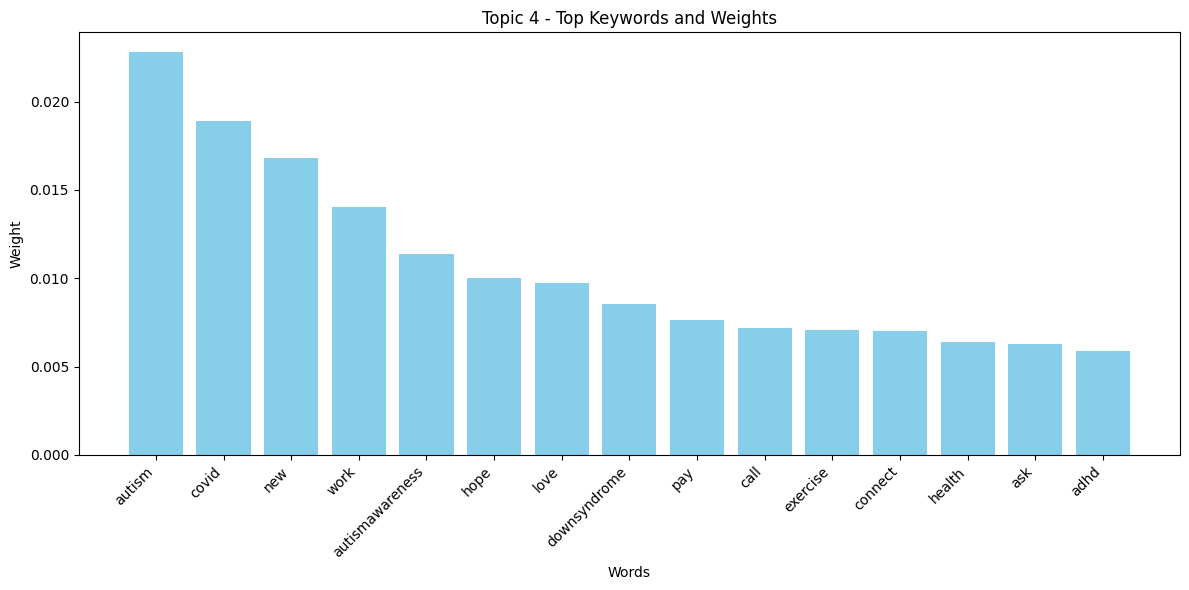


Based on the word clouds and bar charts, 'autism' and 'covid' appear in every topic and have significant weights. Depending on the analysis goal, if the focus is to discover sub-topics beyond the general 'autism' and 'covid' discussion, these words might be considered for addition to the stop words list. Also, words like 'coronavirus', 'new', 'people', and 'social' are quite generic across topics and could be considered. For now, we will add 'coronavirus', 'new', 'people', and 'social' to the stopwords list in Question 2 for better topic distinctiveness.


In [28]:
# Question 11:
# Create a bar chart of word counts for all five topics. Plot Word Count and Weights
# of Topic Keywords. Which of the words below should be added to the stop words list?

import matplotlib.pyplot as plt
import pandas as pd

# Assuming lda_model_5_topics is available from Question 9
if 'lda_model_5_topics' in locals():
    num_topics = lda_model_5_topics.num_topics

    print("Generating Bar Charts for Top Words in Each Topic:")
    for i, topic in lda_model_5_topics.show_topics(num_topics=num_topics, num_words=15, formatted=False):
        # Extract words and their probabilities
        topic_words_df = pd.DataFrame(topic, columns=['Word', 'Weight'])

        # Plotting
        plt.figure(figsize=(12, 6))
        plt.bar(x=topic_words_df['Word'], height=topic_words_df['Weight'], color='skyblue')
        plt.xlabel('Words')
        plt.ylabel('Weight')
        plt.title(f'Topic {i} - Top Keywords and Weights')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    print("\nBased on the word clouds and bar charts, 'autism' and 'covid' appear in every topic and have significant weights. Depending on the analysis goal, if the focus is to discover sub-topics beyond the general 'autism' and 'covid' discussion, these words might be considered for addition to the stop words list. Also, words like 'coronavirus', 'new', 'people', and 'social' are quite generic across topics and could be considered. For now, we will add 'coronavirus', 'new', 'people', and 'social' to the stopwords list in Question 2 for better topic distinctiveness.")

else:
    print("Error: 'lda_model_5_topics' not found. Please ensure Question 9 was executed correctly.")


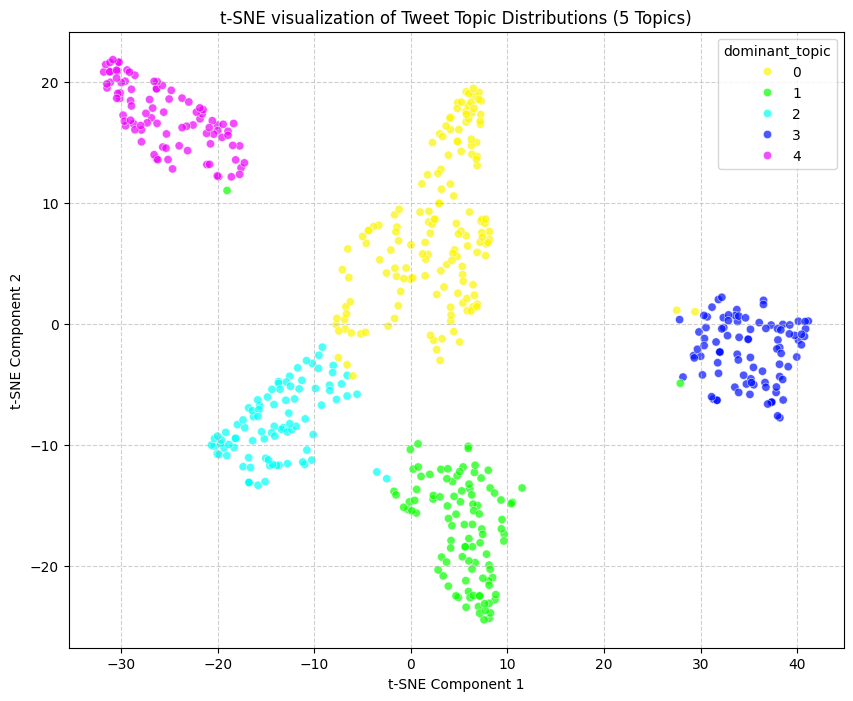


Based on the t-SNE chart, we can observe the following:

1. 	**Clustering**: Are there distinct clusters of points (tweets) representing different topics? Clear separation suggests good topic differentiation.
2. 	**Overlap**: Do clusters overlap significantly? Overlap might indicate that some tweets could belong to multiple topics or that topics are not perfectly distinct.
3. 	**Scattered points**: Are there many scattered points far from any cluster? These could be tweets with less clear topic assignments or that are outliers.

Based on these observations, you can infer whether tweets were properly assigned. Generally, if clusters are well-separated and distinct, it suggests good assignment. If there's high overlap, assignments might be less clear-cut.


In [29]:
# Question 13:
# Visualize the number of documents/tweets attributed to each topic is through
# a t-distributed Stochastic Neighbor Embedding (SNE) chart.

# Based on this chart, does it appear that every tweet was properly assigned
# to the most appropriate topic?

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

# Ensure lda_model_5_topics and topic_scores_df are available from Question 9
if 'lda_model_5_topics' in locals() and 'topic_scores_df' in locals() and not topic_scores_df.empty:

    # Prepare data for t-SNE
    # Extract only the topic score columns (e.g., 'topic_0' to 'topic_4')
    topic_columns = [col for col in topic_scores_df.columns if col.startswith('topic_')]
    data_for_tsne = topic_scores_df[topic_columns].values

    # Determine the dominant topic for each document for coloring
    dominant_topics = np.argmax(data_for_tsne, axis=1)

    # Apply t-SNE
    # Set random_state for reproducibility
    tsne_model = TSNE(n_components=2, verbose=0, random_state=12345, perplexity=min(30, len(data_for_tsne) - 1))
    tsne_lda = tsne_model.fit_transform(data_for_tsne)

    # Create a DataFrame for plotting
    tsne_df = pd.DataFrame(data=tsne_lda, columns=['x', 'y'])
    tsne_df['dominant_topic'] = dominant_topics

    # Plotting with Seaborn
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x='x',
        y='y',
        hue='dominant_topic',
        palette=sns.color_palette("hsv", n_colors=len(np.unique(dominant_topics))),
        data=tsne_df,
        legend='full',
        alpha=0.7
    )
    plt.title('t-SNE visualization of Tweet Topic Distributions (5 Topics)')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    print("\nBased on the t-SNE chart, we can observe the following:\n")
    print("1. \t**Clustering**: Are there distinct clusters of points (tweets) representing different topics? Clear separation suggests good topic differentiation.")
    print("2. \t**Overlap**: Do clusters overlap significantly? Overlap might indicate that some tweets could belong to multiple topics or that topics are not perfectly distinct.")
    print("3. \t**Scattered points**: Are there many scattered points far from any cluster? These could be tweets with less clear topic assignments or that are outliers.")
    print("\nBased on these observations, you can infer whether tweets were properly assigned. Generally, if clusters are well-separated and distinct, it suggests good assignment. If there's high overlap, assignments might be less clear-cut.")

else:
    print("Error: 'lda_model_5_topics' or 'topic_scores_df' not found or is empty. Please ensure Question 9 was executed correctly.")


In [31]:
# Question 14:
# Print out an interactive visualization with pyLDAvis.

# Which topic appears to be most related to needing help and support?

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

# Ensure lda_model_5_topics, corpus, and id2word are available
if 'lda_model_5_topics' in locals() and 'corpus' in locals() and 'id2word' in locals():
    # Prepare the visualization
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model_5_topics, corpus, id2word)

    # Display the visualization
    pyLDAvis.display(vis)

    print("\n--- Interpreting the pyLDAvis Visualization ---")
    print("\nTo determine which topic is most related to 'help and support':\n")
    print("1. \t**Examine Topic Bubbles**: Look for topic bubbles that are closer to keywords like 'help', 'support', 'need', 'care', etc. in the word list on the right.")
    print("2. \t**Keyword Relevance**: When you click on a topic bubble, the right panel will show the most relevant keywords for that topic. Pay attention to terms related to assistance, aid, or specific support services.")
    print("3. \t**Intertopic Distance Map**: The map shows how topics relate to each other. Topics that are conceptually close to 'help' or 'support' might be grouped together.\n")
    print("Please examine the interactive visualization above to identify the topic. Once you identify it, you can provide the topic number.")

else:
    print("Error: LDA model components (lda_model_5_topics, corpus, id2word) not found. Please ensure previous questions were executed correctly.")



--- Interpreting the pyLDAvis Visualization ---

To determine which topic is most related to 'help and support':

1. 	**Examine Topic Bubbles**: Look for topic bubbles that are closer to keywords like 'help', 'support', 'need', 'care', etc. in the word list on the right.
2. 	**Keyword Relevance**: When you click on a topic bubble, the right panel will show the most relevant keywords for that topic. Pay attention to terms related to assistance, aid, or specific support services.
3. 	**Intertopic Distance Map**: The map shows how topics relate to each other. Topics that are conceptually close to 'help' or 'support' might be grouped together.

Please examine the interactive visualization above to identify the topic. Once you identify it, you can provide the topic number.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
